# Problem Statement-2
Prepare a classification model using SVM for salary data 


In [1]:
# SVM Classification
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Importing CSV File

In [2]:
salary_train=pd.read_csv("SalaryData_Train(1).csv")

In [3]:
salary_train


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [4]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
salary_train['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [6]:
salary_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
salary_train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157     True
30158    False
30159     True
30160    False
Length: 30161, dtype: bool

In [8]:
salary_train.duplicated().sum()

3258

# Feature Engineering

### Converting >50K to '1' and <=50K to '0' and all columns with the help of label encoder

In [9]:
salary_train.head(1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [10]:

cols = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']


In [11]:
salary_train.duplicated().sum()

3258

In [12]:
salary_train[cols] 

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
30156,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
30157,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
30158,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
30159,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [13]:
salary_train.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
30156    False
30157     True
30158    False
30159     True
30160    False
Length: 30161, dtype: bool

In [14]:
salary_train[cols] = salary_train[cols].apply(LabelEncoder().fit_transform)


In [15]:
salary_train.head(2)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0


In [16]:
salary_train.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

<AxesSubplot:>

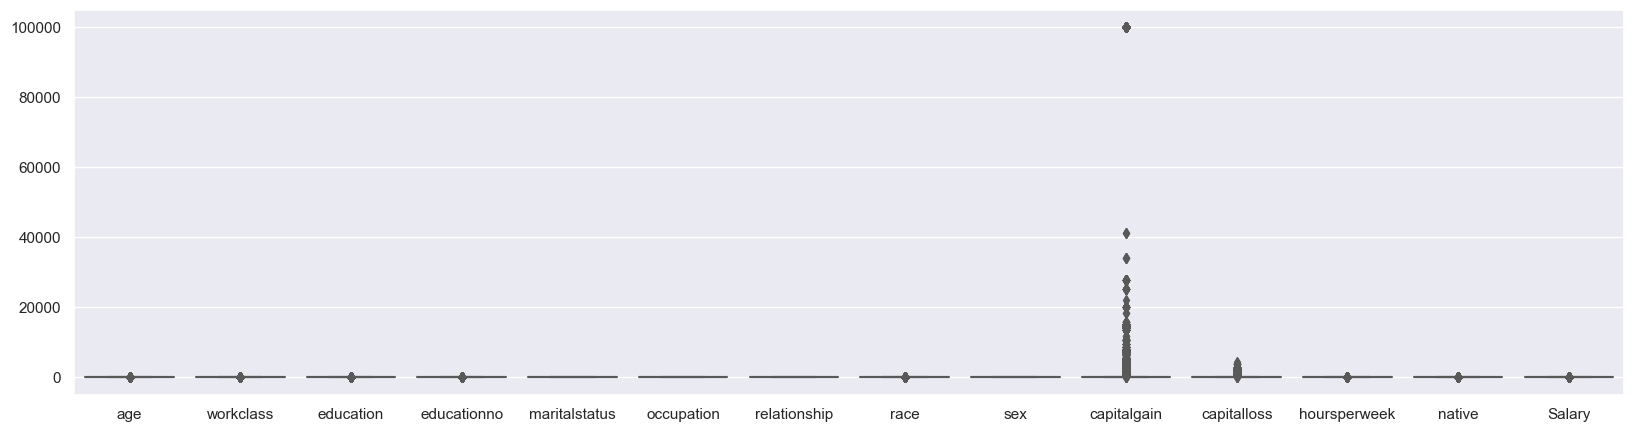

In [17]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=salary_train, orient="v", palette="Set2") 
#There are outliers in the case of capital gain. But we cannot discard it

In [18]:
ls

 Volume in drive C is ssd
 Volume Serial Number is 344C-651C

 Directory of C:\Users\phoneclicker\Downloads\excelr_kd\ASSIGNMENT\Support Vector Machine

01/17/2023  01:00 PM    <DIR>          .
01/17/2023  01:00 PM    <DIR>          ..
01/11/2023  08:16 PM    <DIR>          .ipynb_checkpoints
01/06/2023  06:02 PM               549 forest fires.txt
01/06/2023  06:03 PM            46,843 forestfires.csv
01/06/2023  06:02 PM               608 Problem_statement(salary_data)(1).txt
01/06/2023  06:02 PM         1,694,474 SalaryData_Test(1)(1).csv
01/06/2023  06:02 PM         3,393,618 SalaryData_Train(1).csv
01/06/2023  06:21 PM           120,348 Support Vector Machine-17-Forest.ipynb
01/17/2023  01:00 PM           120,187 Support Vector Machine-17-Salary.ipynb
               7 File(s)      5,376,627 bytes
               3 Dir(s)  26,383,753,216 bytes free


# Importing test data

In [19]:
salary_test=pd.read_csv("SalaryData_Test(1)(1).csv")

In [20]:
salary_test.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


# EDA

In [21]:
salary_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


#### Converting >50K to '1' and <=50K to '0' and all columns with the help of label encoder

In [22]:

cols = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native','Salary']
salary_test[cols] = salary_test[cols].apply(LabelEncoder().fit_transform)
salary_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


<AxesSubplot:>

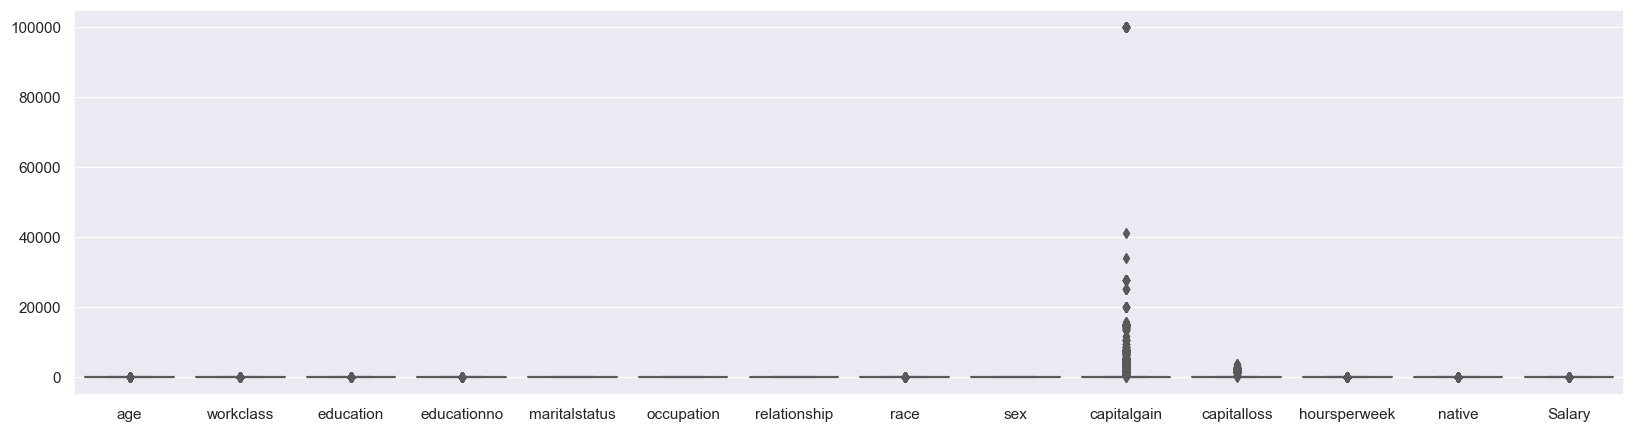

In [23]:
sns.set(rc={'figure.figsize':(20,5)})
sns.boxplot(data=salary_test, orient="v", palette="Set2") 
# Here also outliers are there in the case of capital gain. But we cannot discard it as well

# Splitting Data

In [35]:
salary_train.shape

(30161, 14)

In [36]:
salary_test.shape

(15060, 14)

In [102]:
x_train = salary_train.iloc[:,:13]
y_train = salary_train.iloc[:,13]
x_test = salary_train.iloc[:,:13]
y_test = salary_train.iloc[:,13]

In [103]:
x_train.shape

(30161, 13)

In [104]:
y_train.shape

(30161,)

In [105]:
x_test.shape

(30161, 13)

In [106]:
y_test.shape

(30161,)

# Building Function

In [107]:
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [108]:
x_train=norm_func(x_train)
x_test=norm_func(x_test)

## 1 Applying linear

In [111]:
clf = SVC(kernel = 'linear')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 81.22741288418818


array([[22074,   579],
       [ 5083,  2425]], dtype=int64)

### 2 applying Poly

In [32]:
clf = SVC(kernel = 'poly')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 84.41567065073042


array([[10622,   738],
       [ 1609,  2091]], dtype=int64)

### 3 Applying RBF

In [33]:
clf = SVC(kernel = 'rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 83.93758300132802


array([[10690,   670],
       [ 1749,  1951]], dtype=int64)

### 4 Applying Sigmoid

In [34]:
clf = SVC(kernel = 'sigmoid')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 58.02788844621514


array([[8240, 3120],
       [3201,  499]], dtype=int64)

# Conclusion

### After analysing accuracy of above models we found that the model with Poly gives the best accuracy